Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mean Squared Error for the best Gradient Boosting model: 30.8331
Feature Importance:
Rank                    0.424009
Urns_Delivered          0.311164
Kills                   0.072050
Assists                 0.044417
Structures_Destroyed    0.038727
Mid_Boss_Killed         0.033116
Deaths                  0.032108
Jungle_Creeps_Large     0.012947
Damage_to_Objectives    0.011252
Jungle_Creeps_Medium    0.007880
Jungle_Creeps_Small     0.004133
Crystal_Added           0.003717
Match_Duration          0.001746
Damage_Dealt            0.001616
Souls_Collected         0.001016
Souls_Denied            0.000104
dtype: float64


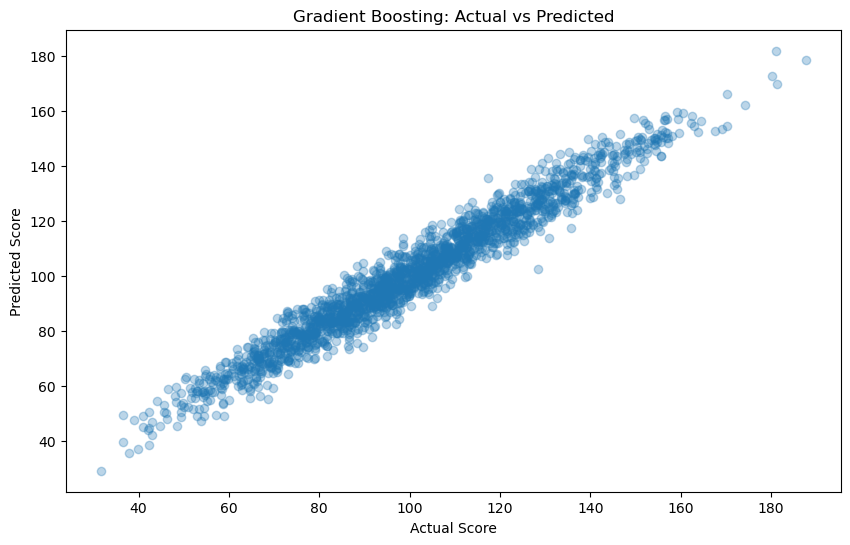

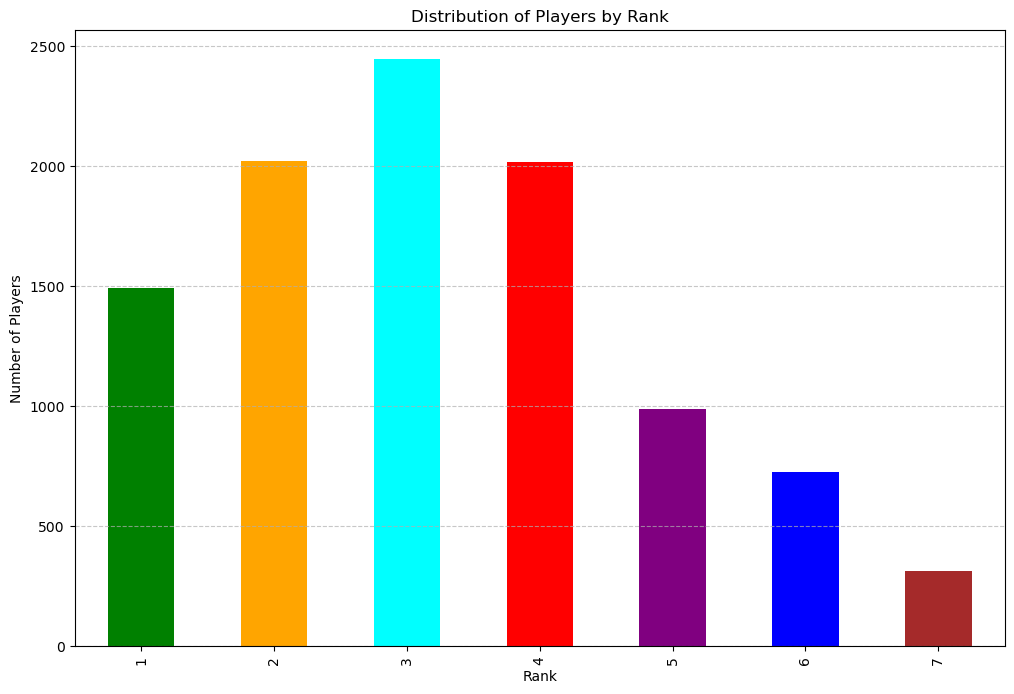

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Number of samples
num_samples = 10000

# Fix random state for reproducibility
np.random.seed(42)

# Generate match duration
match_duration = np.random.uniform(20, 60, num_samples)

# Generate kills
kills = np.random.poisson(lam=5, size=num_samples)
kills = np.clip(kills, 0, 30)

# Generate assists
assists = np.random.poisson(lam=7, size=num_samples)
assists = np.clip(assists, 0, 40)

# Generate deaths
deaths = np.random.poisson(lam=5, size=num_samples)
deaths = np.clip(deaths, 0, 20)

# Generate damage dealt
damage_dealt = np.random.normal(loc=1000 * match_duration, scale=5000)
damage_dealt = np.clip(damage_dealt, 0, np.where(match_duration <= 30, 60000, 100000))

# Generate damage to objectives
damage_to_objectives = np.random.exponential(scale=5000, size=num_samples)
damage_to_objectives = np.clip(damage_to_objectives, 0, 30000)

# Generate structures destroyed
structures_destroyed = np.random.poisson(lam=1, size=num_samples)
structures_destroyed = np.clip(structures_destroyed, 0, 10)

# Generate souls collected
souls_collected = np.random.normal(loc=8000, scale=3000, size=num_samples)
souls_collected = np.clip(souls_collected, 0, 20000)

# Generate souls denied
souls_denied = np.random.poisson(lam=50, size=num_samples)
souls_denied = np.clip(souls_denied, 0, 500)

# Generate urns delivered
urns_delivered = np.random.randint(0, 5, size=num_samples)

# Generate jungle creeps farmed
jungle_creeps_small = np.random.poisson(lam=10, size=num_samples)
jungle_creeps_small = np.clip(jungle_creeps_small, 0, 20)

jungle_creeps_medium = np.random.poisson(lam=5, size=num_samples)
jungle_creeps_medium = np.clip(jungle_creeps_medium, 0, 20)

jungle_creeps_large = np.random.poisson(lam=2, size=num_samples)
jungle_creeps_large = np.clip(jungle_creeps_large, 0, 10)

# Generate mid boss killed
mid_boss_killed = np.random.binomial(1, 0.1, size=num_samples)

# Generate crystal added
crystal_added = np.random.binomial(1, 0.1, size=num_samples)

# Generate player rank (synthetic distribution to match desired histogram)
rank_distribution = [0.15, 0.2, 0.25, 0.2, 0.1, 0.07, 0.03]
rank = np.random.choice(np.arange(1, 8), size=num_samples, p=rank_distribution)

# Create DataFrame
data = pd.DataFrame({
    'Match_Duration': match_duration,
    'Kills': kills,
    'Assists': assists,
    'Deaths': deaths,
    'Damage_Dealt': damage_dealt,
    'Damage_to_Objectives': damage_to_objectives,
    'Structures_Destroyed': structures_destroyed,
    'Souls_Collected': souls_collected,
    'Souls_Denied': souls_denied,
    'Urns_Delivered': urns_delivered,
    'Jungle_Creeps_Small': jungle_creeps_small,
    'Jungle_Creeps_Medium': jungle_creeps_medium,
    'Jungle_Creeps_Large': jungle_creeps_large,
    'Mid_Boss_Killed': mid_boss_killed,
    'Crystal_Added': crystal_added,
    'Rank': rank
})

# Weights for features
weights = {
    'Kills': 3,
    'Assists': 2,
    'Deaths': -2,
    'Damage_Dealt': 0.0001,
    'Damage_to_Objectives': 0.0005,
    'Structures_Destroyed': 5,
    'Souls_Collected': 0.0002,
    'Souls_Denied': 0.01,
    'Urns_Delivered': 10,
    'Jungle_Creeps_Small': 0.5,
    'Jungle_Creeps_Medium': 1,
    'Jungle_Creeps_Large': 2,
    'Mid_Boss_Killed': 15,
    'Crystal_Added': 5,
    'Rank': 10
}

# Calculate performance score
data['Performance_Score'] = (
    weights['Kills'] * data['Kills'] +
    weights['Assists'] * data['Assists'] +
    weights['Deaths'] * data['Deaths'] +
    weights['Damage_Dealt'] * data['Damage_Dealt'] +
    weights['Damage_to_Objectives'] * data['Damage_to_Objectives'] +
    weights['Structures_Destroyed'] * data['Structures_Destroyed'] +
    weights['Souls_Collected'] * data['Souls_Collected'] +
    weights['Souls_Denied'] * data['Souls_Denied'] +
    weights['Urns_Delivered'] * data['Urns_Delivered'] +
    weights['Jungle_Creeps_Small'] * data['Jungle_Creeps_Small'] +
    weights['Jungle_Creeps_Medium'] * data['Jungle_Creeps_Medium'] +
    weights['Jungle_Creeps_Large'] * data['Jungle_Creeps_Large'] +
    weights['Mid_Boss_Killed'] * data['Mid_Boss_Killed'] +
    weights['Crystal_Added'] * data['Crystal_Added'] +
    weights['Rank'] * data['Rank']
)

# Add noise for realism
data['Performance_Score'] += np.random.normal(0, 5, size=num_samples)

# Split features and target variable
X = data.drop(columns=['Performance_Score'])
y = data['Performance_Score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting Regressor model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_gbr = grid_search.best_estimator_

# Predictions and model evaluation
y_pred_best_gbr = best_gbr.predict(X_test_scaled)
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
print(f"Mean Squared Error for the best Gradient Boosting model: {mse_best_gbr:.4f}")

# Feature importance in the best model
feature_importances = pd.Series(best_gbr.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importance:")
print(feature_importances)

# Visualization for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_gbr, alpha=0.3)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()

# Visualization of rank distribution
plt.figure(figsize=(12, 8))
rank_counts = data['Rank'].value_counts().sort_index()
rank_counts.plot(kind='bar', color=['green', 'orange', 'cyan', 'red', 'purple', 'blue', 'brown'])
plt.xlabel('Rank')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Rank')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()